In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
import seaborn as sns
sns.set()

In [2]:
def plot_graph(data, title):
    # Extracting triples and their corresponding types
    data['Number_of_Triples'] = data['Triples'].apply(lambda x: int(x.split('_')[0]))
    data = data.sort_values(by = 'Number_of_Triples')
    data['Type'] = data['Triples'].apply(lambda x: x.split('_')[1])

    # Plotting
    plt.figure(figsize=(10, 6))

    for label, group in data.groupby('Type'):
        plt.plot(group['Number_of_Triples'], group['test_MRR'], marker='o', label=label)

    plt.xlabel('Number of Triples Added')
    plt.ylabel('Test MRR')
    plt.title(title)
    plt.legend()
    
    # Increasing precision of the y-axis labels
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.5f'))
    ax.yaxis.set_major_locator(MaxNLocator(nbins='auto', prune='lower'))
    
    plt.show()

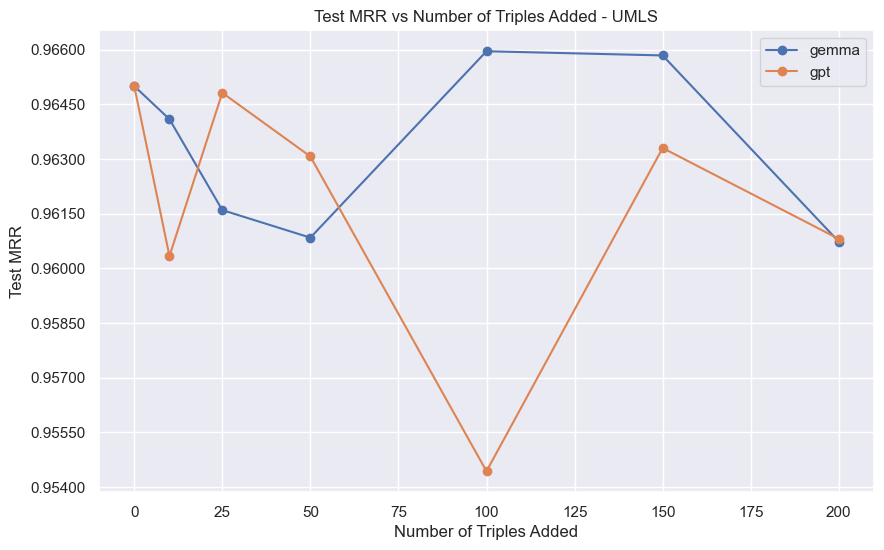

In [3]:
umls = pd.read_csv('outputs/metrics/umls.csv')
title = 'Test MRR vs Number of Triples Added - UMLS'
plot_graph(umls, title)

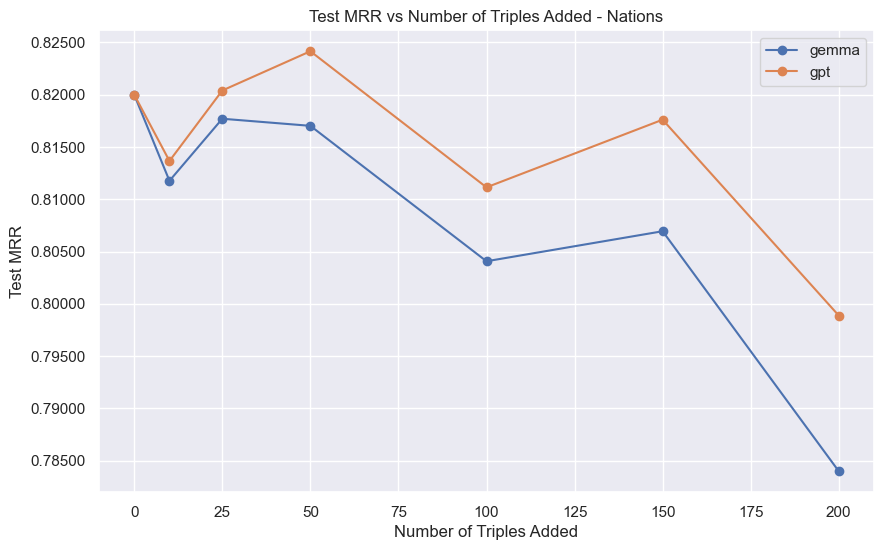

In [4]:
nations = pd.read_csv('outputs/metrics/nations.csv')
title = 'Test MRR vs Number of Triples Added - Nations'
plot_graph(nations, title)

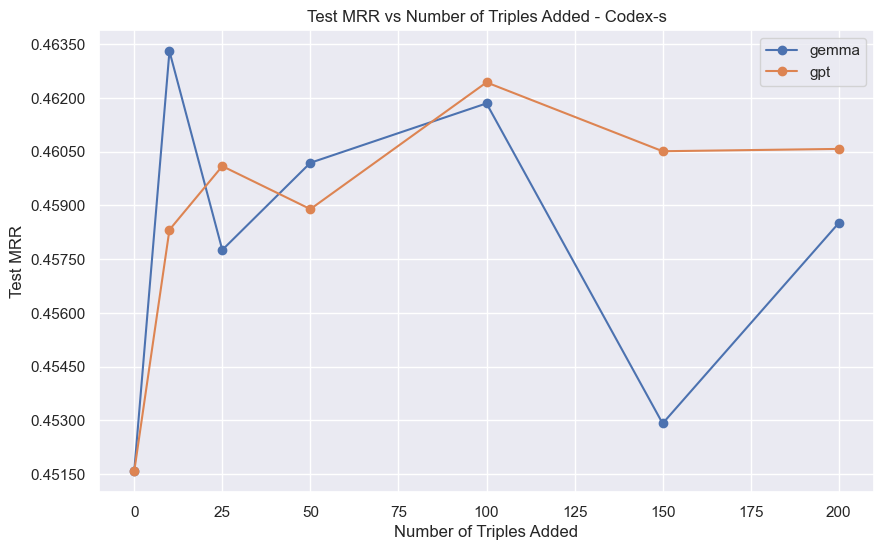

In [5]:
codexs = pd.read_csv('outputs/metrics/codex-s.csv')
title = 'Test MRR vs Number of Triples Added - Codex-s'
plot_graph(codexs, title)

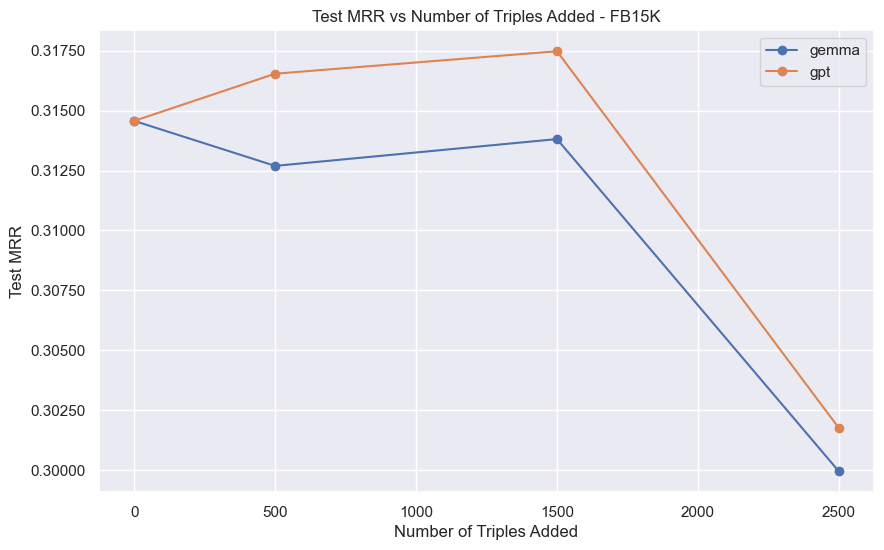

In [6]:
fb15k = pd.read_csv('outputs/metrics/fb15k.csv')
title = 'Test MRR vs Number of Triples Added - FB15K'
plot_graph(fb15k, title)

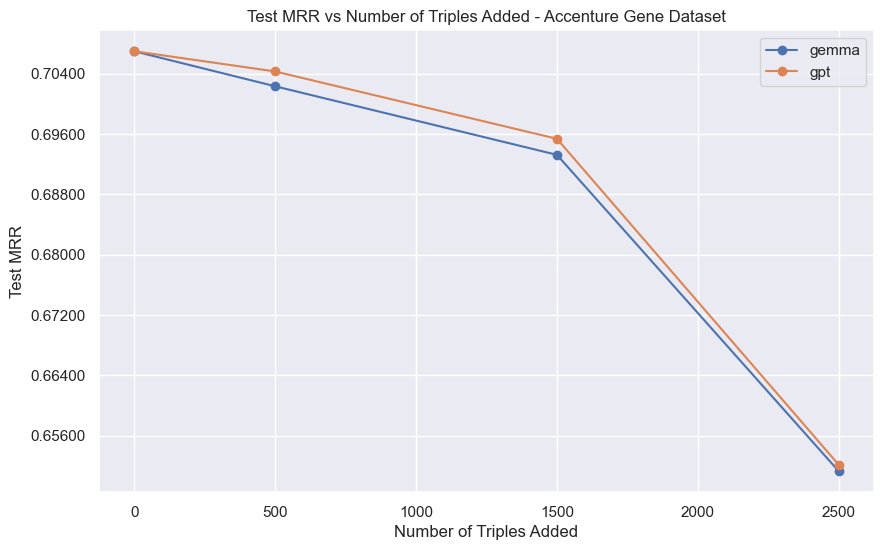

In [7]:
gene = pd.read_csv('outputs/metrics/gene.csv')
title = 'Test MRR vs Number of Triples Added - Accenture Gene Dataset'
plot_graph(gene, title)